In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from code.python.mpmath_integration import quad_phi

from mpmath import mp

In [764]:
x = 1/2
alpha = 5
beta = 0
mu = 1/4
delta = 4

xmu = x - mu
xmu

0.25

In [765]:
mp_result = quad_phi(x, alpha, beta, mu, delta, digits=100)

In [766]:
mp_result

mpf('0.6119970584241221023436824635989891599024974609795747628509994022732567779844592477368674024522124378236')

In [767]:
mp.dps = 100
gamma = mp.sqrt(alpha ** 2 - beta ** 2)
C = mp.exp(delta * gamma)/mp.pi

def f(t):
    r = t ** 2 + alpha ** 2
    q = (mp.sqrt(r) - beta)
    return t * mp.exp(-xmu*q) / mp.sqrt(r) / q * mp.sin(delta * t)

1 - C * mp.quad(f, [0, mp.inf]),  mp.quad(f, [0, mp.inf])

(mpf('0.6119970412515318705116428115893299215329859808620264057978942777558926901786324603955805881086938771188'),
 mpf('0.000000002512437529130090625598949368268491854222188287703367777298723516463285068368097578772565627110872431534'))

In [768]:
mp.dps = 100
gamma = mp.sqrt(alpha ** 2 - beta ** 2)
C = mp.exp(delta * gamma)/mp.pi

def f(t):
    r = t ** 2 + alpha ** 2
    q = (mp.sqrt(r) - beta)
    return t * mp.exp(-xmu*q + delta * t * 1j) / mp.sqrt(r) / q

1 - C * mp.im(mp.quad(f, [0, mp.inf]))

mpf('0.6119970412515318705116428115893299215329859808620264057978942777558926901786324603955805881086938771188')

In [769]:
ts = np.linspace(0, 100, 200) 

r = ts ** 2 + alpha ** 2
q = np.sqrt(r) - beta
integrand = ts * np.exp(-xmu * np.sqrt(r)) / np.sqrt(r) / q * np.sin(delta * ts)

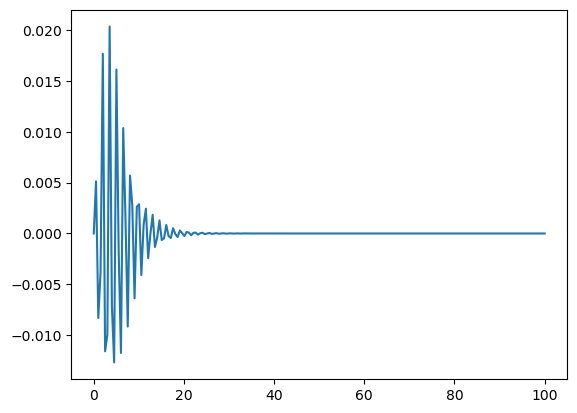

In [770]:
plt.plot(ts, integrand)
plt.show()

In [771]:
xmu, alpha, delta

(0.25, 5, 4)

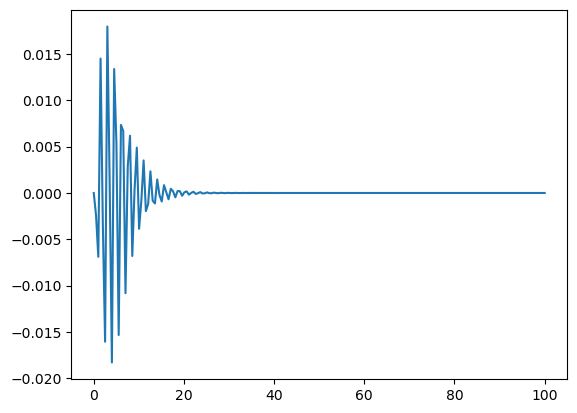

In [772]:
ts = np.linspace(0, 100, 200)

r = ts ** 2 + alpha ** 2
q = np.sqrt(r) - beta
integrand = ts * np.exp(-xmu * np.sqrt(r) + delta * 1j * ts) / np.sqrt(r) / q

plt.plot(ts, integrand)
plt.show()

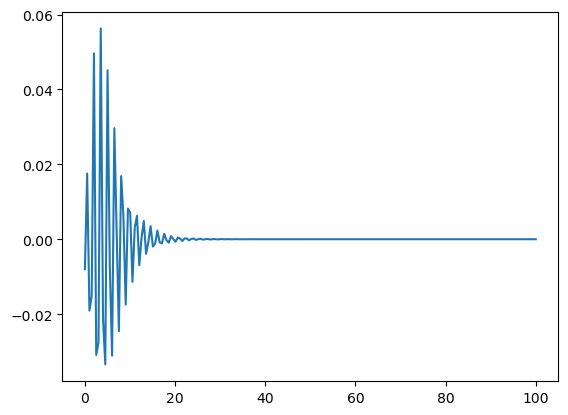

In [788]:
ts = np.linspace(1e-3, 100, 200)

t0 = 0.252883j
r = (ts + t0) ** 2 + alpha ** 2
q = np.sqrt(r) - beta
integrand = np.exp(-xmu * np.sqrt(r) + delta * 1j * (ts + t0) + np.log(ts + t0) - np.log(r))

plt.plot(ts, integrand.imag)
plt.show()

In [774]:
mp.dps = 100
gamma = mp.sqrt(alpha ** 2 - beta ** 2)
C = mp.exp(delta * gamma)/mp.pi

def f(t):
    r = t ** 2 + alpha ** 2
    q = (mp.sqrt(r) - beta)
    return t * mp.exp(-xmu*q + delta * t * 1j) / mp.sqrt(r) / q

1 - C * mp.im(mp.quad(f, [0, mp.inf]))

mpf('0.6119970412515318705116428115893299215329859808620264057978942777558926901786324603955805881086938771188')

In [778]:
def f(t):
    t0 = 0.252883j
    r = (t + t0) ** 2 + alpha ** 2
    q = (mp.sqrt(r) - beta)
    return mp.exp(-xmu*q + delta * (t + t0) * 1j - 1/2 * mp.log(r) - mp.log(q) + mp.log(t + t0))


1 - C * mp.im(mp.quad(f, [0, mp.inf]))

mpf('0.6119970521001582059344814492312206975966571871684157517395844360633063376717781927259238887607596023266')

In [779]:
t0 = 0.252883j
-xmu * 2 * t0 / np.sqrt(t0 ** 2 + alpha ** 2) + 1 / t0 - 1/(t0 ** 2 + alpha ** 2) * 2 * t0 + delta * 1j

-1.1119702509887475e-06j

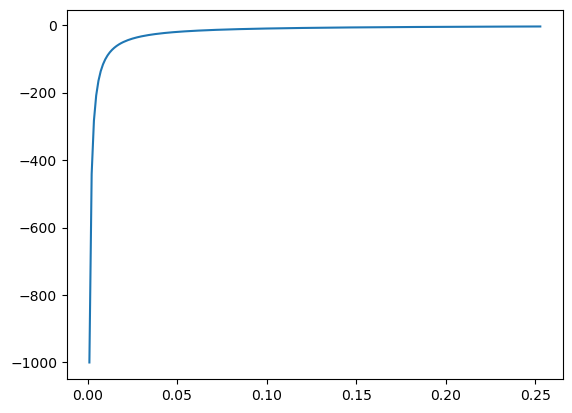

In [780]:
ts = np.linspace(1e-3, 0.252883, 200)*1j
plt.plot(ts.imag, (-xmu * 2 * ts / np.sqrt(r) + 1 / ts - 1/r * 2 * ts).imag)

In [704]:
mp.dps = 200

In [705]:
gamma = mp.sqrt(alpha ** 2 - beta ** 2)
C = mp.exp(delta * gamma)/mp.pi

def f(t):
    r = t ** 2 + alpha ** 2
    q = (mp.sqrt(r) - beta)
    return t * mp.exp(-xmu*q) / mp.sqrt(r) / q * mp.sin(delta * t)

In [706]:
alpha

5

In [707]:
mp.dps = 20

N = 136
mp.quad(f, [0, mp.inf]), mp.quad(f, [0, N])

(mpf('0.005850131764047746348583'), mpf('0.0058501317640478604032369'))

In [708]:
float(abs(mp.quad(f, [N, mp.inf])))

9.411149812287761e-18

In [709]:
def fbound(t):
    r = t ** 2 + alpha ** 2
    q = (mp.sqrt(r) - beta)
    return mp.exp(-xmu*q)

mp.quad(fbound, [N, mp.inf]), mp.quad(fbound, [N, mp.inf]) / (mp.sqrt(N**2 + alpha ** 2) - beta)

(mpf('6.7042346096568058003152e-15'), mpf('4.9262561247657807069296e-17'))

In [710]:
def bound_1(N):
    return mp.sqrt(alpha**2 +  N**2) * mp.besselk(1, mp.sqrt(alpha**2 +  N**2) * xmu) * np.exp(beta * xmu) / (np.sqrt(N**2 + alpha**2) - beta)

def bound_2(N):
    return np.exp(-xmu * N) / xmu * np.exp(beta * xmu) / (np.sqrt(N**2 + alpha**2) - beta)

def bound_3(N):
    return np.exp(-xmu * N) / xmu * np.exp(beta * xmu) / N

def bound_4(N):
    return np.exp(-xmu * N) / xmu * np.exp(beta * xmu) / N

def bound_5(N):
    q1 = mp.sqrt(alpha**2 +  N**2) * np.exp(beta * xmu) / (np.sqrt(N**2 + alpha**2) - beta)
    q2 = mp.sqrt(mp.pi / 2) * mp.exp(-mp.sqrt(alpha**2 +  N**2) * xmu) * (mp.sqrt(alpha**2 +  N**2) * xmu + 1) / (mp.sqrt(alpha**2 +  N**2) * xmu) ** (3/2)

    return q1 * q2

In [711]:
print(bound_1(N))
print(bound_2(N))
print(bound_3(N))
print(bound_4(N))
print(bound_5(N))

3.6383443040288654667e-16
5.037503846306336e-17
5.040907151594156e-17
5.040907151594156e-17
3.7048136501454746123e-16


In [645]:
eps = 1e-16
C = 1 #mp.exp(delta * gamma)/mp.pi
c = eps / C

mp.lambertw(mp.exp(beta * xmu) / c) / xmu, C

(mpf('135.2812010644573052962'), 1)

In [367]:
np.sqrt(N ** 2 + alpha ** 2), N

(25.0, 20)

In [368]:
mp.quad(lambda t: mp.exp(-xmu * mp.sqrt(t**2 + alpha**2)), [N, mp.inf])

mpf('7.0533497810059886416726e-20')

In [369]:
mp.quad(lambda t: mp.exp(-xmu * t), [N, mp.inf])

mpf('3.6029238768530614631908e-16')

In [370]:
np.exp(-xmu * N) / xmu * np.exp(beta * xmu) / (np.sqrt(N**2 + alpha**2) - beta)

1.2720697492935889e-15

In [391]:
np.exp(beta * xmu) / xmu / (np.sqrt(N**2 + alpha**2) - beta)

2.0175197346606053

In [ ]:
np.exp(-xmu * N) * np.exp(beta * xmu) / xmu / N

In [385]:
mp.quad(lambda t: mp.exp(-xmu * mp.sqrt(t**2 + alpha**2)), [N, mp.inf]), alpha * mp.besselk(1, alpha * xmu)

(mpf('7.0533497810059886416726e-20'), mpf('1.4532028456878444992801e-11'))

Upper bound integral

In [394]:
mp.quad(lambda t: mp.exp(-xmu * mp.sqrt(t**2 + alpha**2)), [N, mp.inf])

mpf('7.0533497810059886416726e-20')

In [390]:
mp.quad(lambda t: mp.exp(-xmu * mp.sqrt(t**2 + N ** 2 + alpha**2)), [0, mp.inf]), mp.sqrt(alpha**2 +  N**2) * mp.besselk(1, mp.sqrt(alpha**2 +  N**2) * xmu)

(mpf('4.7734982081422398265734e-19'), mpf('4.7731836359753477775391e-19'))

In [392]:
mp.sqrt(alpha**2 +  N**2) * mp.besselk(1, mp.sqrt(alpha**2 +  N**2) * xmu) * np.exp(beta * xmu) / (np.sqrt(N**2 + alpha**2) - beta)

mpf('1.6852486319793821853691e-18')

In [393]:
mp.quad(lambda t: mp.exp(-xmu * mp.sqrt(t**2 + alpha**2)), [N, mp.inf]) * np.exp(beta * xmu) / (np.sqrt(N**2 + alpha**2) - beta)

mpf('2.4902976662626370941395e-19')

Upper bound besselk

In [398]:
mp.besselk(1, mp.sqrt(alpha**2 +  N**2) * xmu), 1 / (mp.sqrt(alpha**2 +  N**2) * xmu), mp.sqrt(mp.pi / 2) * mp.exp(-(mp.sqrt(alpha**2 +  N**2) * xmu))

(mpf('1.9092734543901391110151e-20'),
 mpf('0.022857142857142857142858'),
 mpf('1.2522076574800120649604e-19'))

In [399]:
mp.sqrt(alpha**2 +  N**2) * np.exp(beta * xmu) / (np.sqrt(N**2 + alpha**2) - beta) * mp.sqrt(mp.pi / 2) * mp.exp(-(mp.sqrt(alpha**2 +  N**2) * xmu))

mpf('1.1052797266258352662811e-17')

#### Closed-form: special case $\beta=0$

In [78]:
int1 = delta / xmu * mp.besselk(0, alpha * mp.sqrt(xmu ** 2 + delta ** 2))

In [79]:
def f1(t):
    r = t ** 2 + alpha ** 2
    return t * mp.exp(-xmu*mp.sqrt(r)) / r ** (3/2) * mp.sin(delta * t) / xmu

int2 = mp.quad(f1, [0, mp.inf])

In [80]:
int1 - int2

mpf('0.14335038629938562')

In [81]:
def f10(t):
    r = t ** 2 + alpha ** 2
    return -xmu * t * mp.exp(-xmu*mp.sqrt(r)) / mp.sqrt(r) * -mp.sin(delta * t) / xmu ** 2 / r

mp.quad(f10, [0, mp.inf])

mpf('0.095791824426695496')

In [108]:
def f11(t):
    r = t ** 2 + alpha ** 2
    return mp.exp(-xmu*mp.sqrt(r)) * delta * mp.cos(delta * t) / r / xmu ** 2

def f12(t):
    r = t ** 2 + alpha ** 2
    return mp.exp(-xmu*mp.sqrt(r)) * t * 2 / r ** 2 * mp.sin(delta * t) / xmu ** 2

In [109]:
int2

mpf('0.095791824426695496')

In [111]:
mp.quad(f11, [0, mp.inf]) - mp.quad(f12, [0, mp.inf])

mpf('0.095791824426695454')